<a href="https://colab.research.google.com/github/correctchemist/code/blob/main/bb1_dihydroorate_part4b_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Beatrice Iwuala

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [18]:
df = pd.read_csv('dihydroorotate_06_bioactivity_data2_3class_pIC50_pubchem_fp.csv')

In [19]:
df

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,13.744296,-3.693263,13.744296,0.327769,0.774008,331.371,314.235,331.120843,124,0,...,0,0,0,0,0,0,0,0,0,4.370590
1,13.252877,-1.606550,13.252877,0.164514,0.710808,370.202,358.106,369.000055,114,0,...,0,0,0,0,0,0,0,0,0,3.845880
2,13.727252,-3.617987,13.727252,0.218218,0.719488,384.229,370.117,383.015705,120,0,...,0,0,0,0,0,0,0,0,0,4.029653
3,13.269921,-1.677155,13.269921,0.265269,0.753503,317.344,302.224,317.105193,118,0,...,0,0,0,0,0,0,0,0,0,3.813892
4,13.699475,-3.640487,13.699475,0.278290,0.800108,305.333,290.213,305.105193,114,0,...,0,0,0,0,0,0,0,0,0,3.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,12.345880,-3.603915,12.345880,0.208836,0.874182,276.292,260.164,276.111007,106,0,...,0,0,0,0,0,0,0,0,0,3.602060
547,12.561833,-3.705638,12.561833,0.243275,0.850289,302.330,284.186,302.126657,116,0,...,0,0,0,0,0,0,0,0,0,3.602060
548,12.701226,-3.662697,12.701226,0.206424,0.715545,338.363,320.219,338.126657,128,0,...,0,0,0,0,0,0,0,0,0,3.602060
549,12.240651,-3.423406,12.240651,0.052663,0.835805,247.254,234.150,247.095691,94,0,...,0,0,0,0,0,0,0,0,0,3.602060


## **3. Input features**
The ***Dihydroorotate*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [20]:
X = df.drop('pIC50', axis=1)
X

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,13.744296,-3.693263,13.744296,0.327769,0.774008,331.371,314.235,331.120843,124,0,...,0,0,0,0,0,0,0,0,0,0
1,13.252877,-1.606550,13.252877,0.164514,0.710808,370.202,358.106,369.000055,114,0,...,0,0,0,0,0,0,0,0,0,0
2,13.727252,-3.617987,13.727252,0.218218,0.719488,384.229,370.117,383.015705,120,0,...,0,0,0,0,0,0,0,0,0,0
3,13.269921,-1.677155,13.269921,0.265269,0.753503,317.344,302.224,317.105193,118,0,...,0,0,0,0,0,0,0,0,0,0
4,13.699475,-3.640487,13.699475,0.278290,0.800108,305.333,290.213,305.105193,114,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,12.345880,-3.603915,12.345880,0.208836,0.874182,276.292,260.164,276.111007,106,0,...,0,0,0,0,0,0,0,0,0,0
547,12.561833,-3.705638,12.561833,0.243275,0.850289,302.330,284.186,302.126657,116,0,...,0,0,0,0,0,0,0,0,0,0
548,12.701226,-3.662697,12.701226,0.206424,0.715545,338.363,320.219,338.126657,128,0,...,0,0,0,0,0,0,0,0,0,0
549,12.240651,-3.423406,12.240651,0.052663,0.835805,247.254,234.150,247.095691,94,0,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [21]:
Y = df.pIC50
Y

0      4.370590
1      3.845880
2      4.029653
3      3.813892
4      3.698970
         ...   
546    3.602060
547    3.602060
548    3.602060
549    3.602060
550    8.000000
Name: pIC50, Length: 551, dtype: float64

### **3.3. Let's examine the data dimension**

In [22]:
X.shape

(551, 1089)

In [23]:
Y.shape

(551,)

### **3.4. Remove low variance features**

In [24]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [25]:
X.shape

(551, 273)

## **4. Data split (80/20 ratio)**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
X_train.shape, Y_train.shape

((440, 273), (440,))

In [28]:
X_test.shape, Y_test.shape

((111, 273), (111,))

## **5. Building a Regression Model using Random Forest**

In [30]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6465145372861509

In [31]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

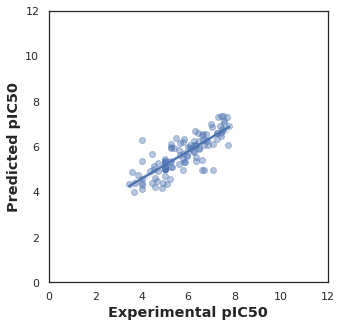

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show